# Assignment 03

##### 1. Input points

plot a set of points $\{ (x^{(i)}, y^{(i)})\}$ that are loaded from 'data.csv' file (in black color)\

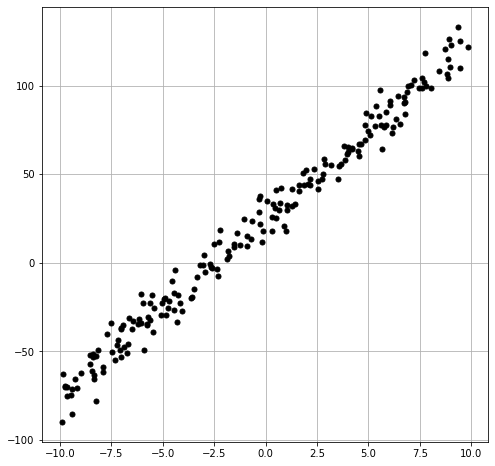

In [1]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.plot(x_data, y_data, 'ko', linewidth=0, markersize=5)
plt.grid()
plt.show()